<a href="https://colab.research.google.com/github/bajajharsha/machine-learning-journey/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=fetch_california_housing()

In [5]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
dataset = pd.DataFrame(df.data)
print(dataset.head())

        0     1         2         3       4         5      6       7
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25


In [7]:
dataset.columns=df.feature_names

In [8]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df.target.shape

(20640,)

In [10]:
dataset["Price"]=df.target

In [11]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
# allows index-based selection
X=dataset.iloc[:,:-1] ## independent features - Selects all rows (:) and all columns except the last one (:-1).
# or X = dataset
y=dataset.iloc[:,-1] ## dependent features - Selects all rows (:) but only the last column (-1).
# or y= df.target

# Linear Regression

In [19]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [21]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [25]:
X_test=scaler.transform(X_test)
X_test

array([[   1.6812    ,   25.        ,    4.19220056, ...,    3.87743733,
          36.06      , -119.01      ],
       [   2.5313    ,   30.        ,    5.03938356, ...,    2.67979452,
          35.14      , -119.46      ],
       [   3.4801    ,   52.        ,    3.97715472, ...,    1.36033229,
          37.8       , -122.44      ],
       ...,
       [   3.512     ,   16.        ,    3.76228733, ...,    2.36956522,
          33.67      , -117.91      ],
       [   3.65      ,   10.        ,    5.50209205, ...,    3.54751943,
          37.82      , -121.28      ],
       [   3.052     ,   17.        ,    3.35578145, ...,    2.61499365,
          34.15      , -118.24      ]])

In [26]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [27]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
# divide the training data internally as well, multiple trian test and then validate and then find mean of each

In [30]:
np.mean(mse)
# this should be closer to 0

-0.5257104326776999

In [31]:
##prediction
reg_pred=regression.predict(X_test)

In [32]:
reg_pred

array([75.39904685, 77.64758448, 81.9468823 , ..., 74.04218911,
       71.25418692, 74.51758511])

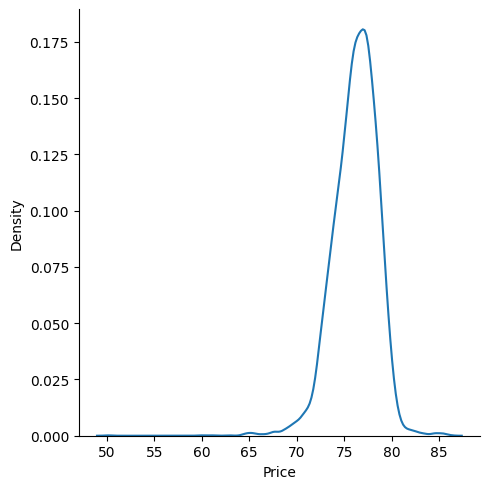

In [33]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [34]:
from sklearn.metrics import r2_score

In [35]:
score=r2_score(reg_pred,y_test)

In [36]:
score

-759.6180217570047